In [1]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


# Run Random Forest Algorithm

Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see the random forest ensemble with default hyperparameters achieves a classification accuracy of about 90.5 percent.

In [2]:
# evaluate random forest algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.903 (0.028)


In [4]:
avg_scores_mean = []
avg_scores_std = []
for i in range(50):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  avg_scores_mean.append(mean(n_scores))
  avg_scores_std.append(std(n_scores))

Accuracy: 0.903 (0.002)


In [5]:
print('Accuracy: %.3f (%.3f)' % (mean(avg_scores_mean), mean(avg_scores_std)))

Accuracy: 0.903 (0.025)


First, the random forest ensemble is fit on all available data, then the predict() function can be called to make predictions on new data.

The example below demonstrates this on our binary classification dataset.

In [8]:
# make predictions using random forest for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
# define the model
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(X, y)


[-0.05916285 -3.54893654  0.28450157  1.46921884  0.77477498 -0.16451756
  0.57742115 -3.41655027  1.29000848 -2.33725005  2.64529773 -0.96192472
 -0.59736558  0.07244451  1.23651815 -2.18227059  2.07976122  2.25695685
  1.22878976 -2.35705572]
[1]
1


In [10]:
import random
# make a single prediction
n = random.randint(0, 999)
single_sample = X[n]
yhat = model.predict([single_sample])
print(n)
print(single_sample)
print(yhat)
print(y[n])

247
[-15.71994252   1.27043791  -3.75110281  -4.5058419    1.03141218
   0.37076139   1.67554872  -2.53051892  -0.87678976   2.75366481
   0.30791902  -1.06172483  13.32945998  -2.25835973   3.00089621
  -3.54960023  -2.18788074   1.08561411  -3.33013869   2.28928554]
[1]
1


Random Forest Hyperparameters
In this section, we will take a closer look at some of the hyperparameters you should consider tuning for the random forest ensemble and their effect on model performance.

# Explore Number of Samples
Each decision tree in the ensemble is fit on a bootstrap sample drawn from the training dataset.

This can be turned off by setting the “bootstrap” argument to False, if you desire. In that case, the whole training dataset will be used to train each decision tree. This is not recommended.

The “max_samples” argument can be set to a float between 0 and 1 to control the percentage of the size of the training dataset to make the bootstrap sample used to train each decision tree.

For example, if the training dataset has 100 rows, the max_samples argument could be set to 0.5 and each decision tree will be fit on a bootstrap sample with (100 * 0.5) or 50 rows of data.

A smaller sample size will make trees more different, and a larger sample size will make the trees more similar. Setting max_samples to “None” will make the sample size the same size as the training dataset and this is the default.

The example below demonstrates the effect of different bootstrap sample sizes from 10 percent to 100 percent on the random forest algorithm.

In this case, we can see a general trend that the larger the sample, the better the performance of the model.

>0.1 0.862 (0.025)
>0.2 0.868 (0.030)
>0.3 0.885 (0.031)
>0.4 0.887 (0.030)
>0.5 0.896 (0.027)
>0.6 0.898 (0.025)
>0.7 0.900 (0.029)
>0.8 0.903 (0.025)
>0.9 0.900 (0.028)
>1.0 0.898 (0.026)


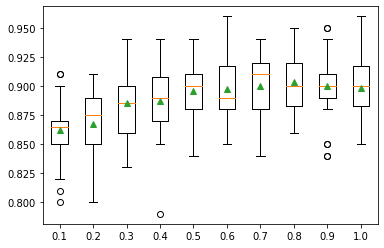

In [27]:
# explore random forest bootstrap sample size on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = {} # store models in dictionary format
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1): # arange 
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples = i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [28]:
import numpy as np
for i in np.arange(0.1, 1.1, 0.1):
	key = '%.1f' % i

print(key)

1.0


# Explore Number of Features
The number of features that is randomly sampled for each split point is perhaps the most important feature to configure for random forest.

It is set via the max_features argument and defaults to the square root of the number of input features. In this case, for our test dataset, this would be sqrt(20) or about four features.

The example below explores the effect of the number of features randomly selected at each split point on model accuracy. We will try values from 1 to 7 and would expect a small value, around four, to perform well based on the heuristic.

>1 0.893 (0.023)
>2 0.898 (0.027)
>3 0.904 (0.024)
>4 0.903 (0.030)
>5 0.899 (0.026)
>6 0.899 (0.027)
>7 0.899 (0.026)


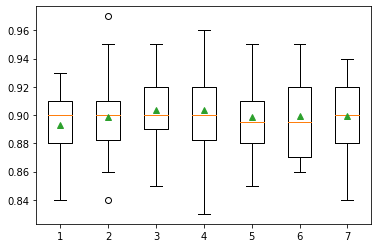

In [30]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 7
	for i in range(1, 8):
		models[i] = RandomForestClassifier(max_features=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Number of Trees
The number of trees is another key hyperparameter to configure for the random forest.

Typically, the number of trees is increased until the model performance stabilizes. Intuition might suggest that more trees will lead to overfitting, although this is not the case. Both bagging and random forest algorithms appear to be somewhat immune to overfitting the training dataset given the stochastic nature of the learning algorithm.

The number of trees can be set via the “n_estimators” argument and defaults to 100.

The example below explores the effect of the number of trees with values between 10 to 1,000.

>10 0.867 (0.027)
>50 0.896 (0.022)
>100 0.907 (0.025)
>500 0.908 (0.023)
>1000 0.909 (0.023)


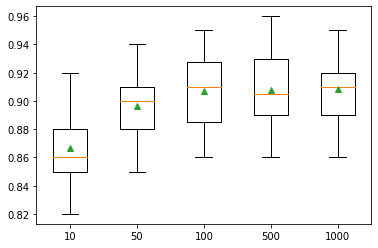

In [31]:
# explore random forest number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[n] = RandomForestClassifier(n_estimators = n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Explore Tree Depth
A final interesting hyperparameter is the maximum depth of decision trees used in the ensemble.

By default, trees are constructed to an arbitrary depth and are not pruned. This is a sensible default, although we can also explore fitting trees with different fixed depths.

The maximum tree depth can be specified via the max_depth argument and is set to None (no maximum depth) by default.

The example below explores the effect of random forest maximum tree depth on model performance.

>1 0.776 (0.037)
>2 0.812 (0.036)
>3 0.838 (0.032)
>4 0.857 (0.032)
>5 0.875 (0.024)
>6 0.883 (0.023)
>7 0.891 (0.023)
>None 0.899 (0.027)


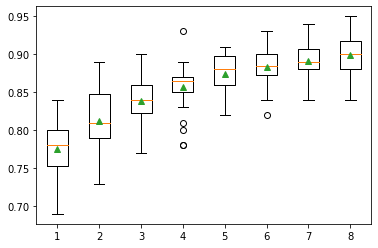

In [35]:
# explore random forest tree depth effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# consider tree depths from 1 to 7 and None=full
	depths = [1, 2, 3, 4, 5, 6, 7, None]
	for n in depths:
		models[n] = RandomForestClassifier(max_depth = n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [36]:
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_true = [0, 1, 1, 0]

In [37]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
# define the model
model = RandomForestClassifier()
# fit the model on the whole dataset
model.fit(x, y_true)

RandomForestClassifier()

In [38]:
preds = model.predict(x)

In [39]:
preds

array([0, 1, 1, 0])

In [41]:
y_true

[0, 1, 1, 0]